In [143]:
import numpy as np
import pandas as pd
import datetime

In [144]:
#loading loan file
loan = pd.read_csv("loan.csv", encoding='ISO-8859-1', low_memory=False)

In [145]:
loan.head(50)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [146]:
loan.shape

(39717, 111)

In [147]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


## SECTION - A
### Data cleaning for entire dataset


In [148]:
# Checking number of missing values in each column
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [149]:
#checking percentage of missing values in each column
round(loan.isnull().sum()/len(loan.index), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


In [150]:
#taking ideally, removing the columns having more than 90% missing values
#As the data is huge droping all columns might drop the columns having some values so to avoid dropping all missing lets do 
#with percentage drop more than 90.
#assuming some columns may have 0 or nan/na with specific values.
missing_col = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(missing_col)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [151]:
#dropping missing columns
loan = loan.drop(missing_col, axis=1)
print(loan.shape)

(39717, 55)


In [152]:
#checking number of missing values again
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [153]:
#checking null values in rows
loan.isnull().sum(axis=1)

0        2
1        1
2        3
3        0
4        0
5        2
6        1
7        1
8        2
9        1
10       1
11       2
12       1
13       1
14       2
15       2
16       1
17       1
18       0
19       2
20       1
21       1
22       1
23       2
24       2
25       2
26       2
27       0
28       1
29       1
        ..
39687    4
39688    5
39689    4
39690    4
39691    4
39692    4
39693    4
39694    4
39695    4
39696    4
39697    4
39698    4
39699    4
39700    5
39701    4
39702    4
39703    4
39704    5
39705    4
39706    5
39707    4
39708    4
39709    5
39710    5
39711    4
39712    4
39713    4
39714    6
39715    6
39716    4
Length: 39717, dtype: int64

In [154]:
#checking some rows have more than 5 missing values
len(loan[loan.isnull().sum(axis=1) > 5].index)

4

In [155]:
# There are now 2 columns having approx 32% and 64% missing values
# description and months since last delinquent
loan.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


In [156]:
#dropping the two columns
loan = loan.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [157]:
#again checking whether some rows have more than 5 missing values
len(loan[loan.isnull().sum(axis=1) > 5].index)

0

In [158]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [159]:
#Non-contributing variables zip code, address state.
loan = loan.drop(['title', 'url', 'zip_code'], axis=1)

In [160]:
# The column int_rate is character type and convert it to float to int
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

## SECTION - B

### Complete Loan data - Univarite Analysis


In [161]:
#Convert Date Columns to Datetime 'issue_id', 'last_credit_pull_day', 'last_pymnt_day'
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y') 
loan['last_credit_pull_d'] = pd.to_datetime(loan['last_credit_pull_d'], format='%b-%y')
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'], format='%b-%y')

In [162]:
loan['loan_status'] = loan['loan_status'].astype('category')
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [163]:
#we can see that fully paid comprises most of the loans. The category 'current' are neither fully paid or not defaulted,
#so remove the current loans and tag the other two values as 0 or 1.


In [164]:
# filtering only fully paid or charged-off
loan = loan[loan['loan_status'] != 'Current']
loan['loan_status'] = loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

In [165]:
# converting loan_status to integer type
loan['loan_status'] = loan['loan_status'].apply(lambda x: pd.to_numeric(x))

In [166]:
#checking the values
loan['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [167]:
# default rate
round(np.mean(loan['loan_status']), 2)

0.15

In [168]:
#the overall default rate is 15%

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

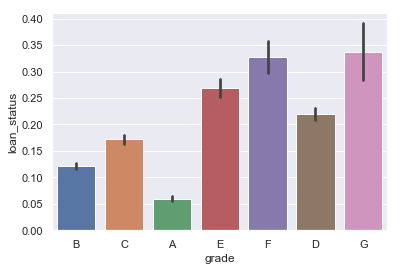

In [170]:
# plotting default rates across grade of the loan
#As grade goes to A to G, default rate increases
sns.barplot(x='grade', y='loan_status', data=loan)
plt.show()

In [171]:
#define function category_plot for all variables
def category_plot(cat_var):
    sns.barplot(x=cat_var,y='loan_status',data=loan)
    plt.show()

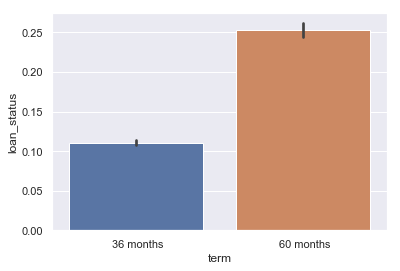

In [172]:
category_plot('term')#no. of payment of the loans either 36 or 60 months.

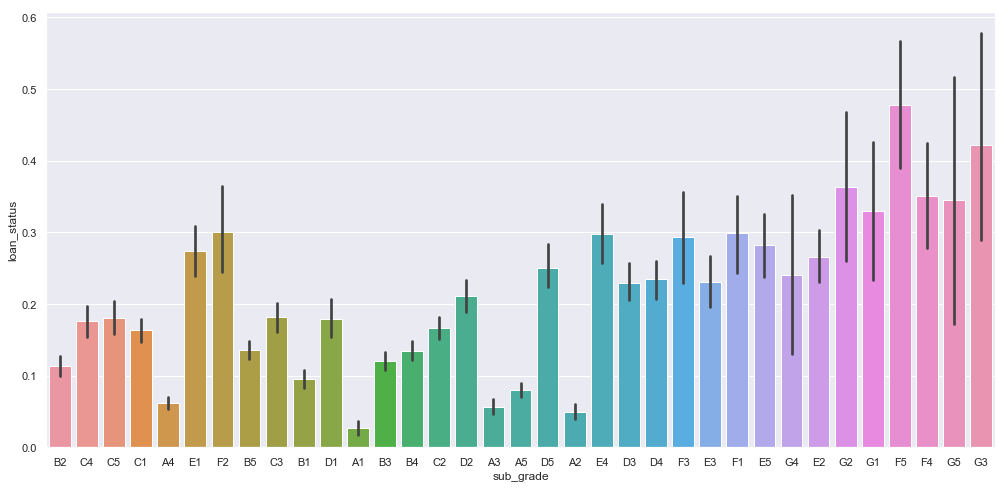

In [173]:
plt.figure(figsize=(17,8))
category_plot('sub_grade')

In [174]:
#this plot clearly shows that A1 is better than A2 and A2 is better than A3 so on.

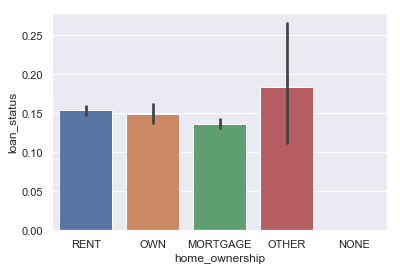

In [175]:
category_plot('home_ownership')#shows others has more default rate.

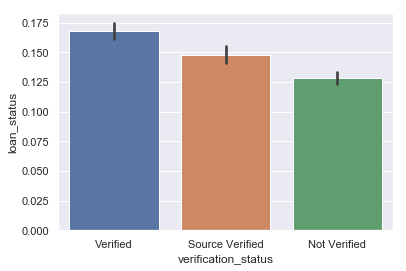

In [176]:
category_plot('verification_status')

In [177]:
#shows verified loans has default more than not verified.

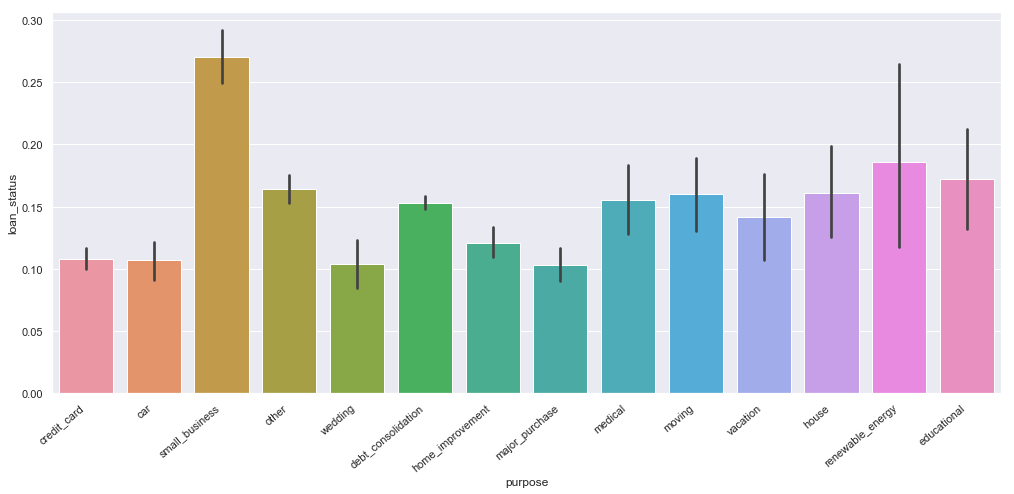

In [178]:
plt.figure(figsize=(17,7))
plt.xticks(rotation=40,ha='right')
category_plot('purpose')

In [179]:
#Derived Metrics
#extracting month and year from issue_date
loan['month'] = loan['issue_d'].apply(lambda x: x.month)
loan['year'] = loan['issue_d'].apply(lambda x: x.year)

In [180]:
loan.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11532
2011    20516
Name: year, dtype: int64

In [181]:
loan.groupby('month').month.count()

month
1     2379
2     2358
3     2691
4     2831
5     2919
6     3180
7     3351
8     3388
9     3498
10    3761
11    4006
12    4215
Name: month, dtype: int64

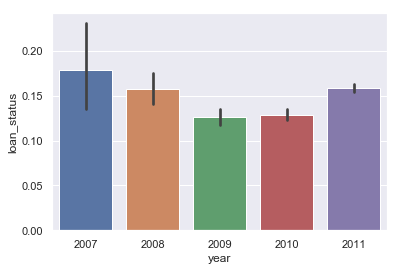

In [182]:
category_plot('year')#Derived Metrics

In [183]:
#default rate across: default rate increased suddenly in 2011 inspite of reducing from 2008 to 2010.

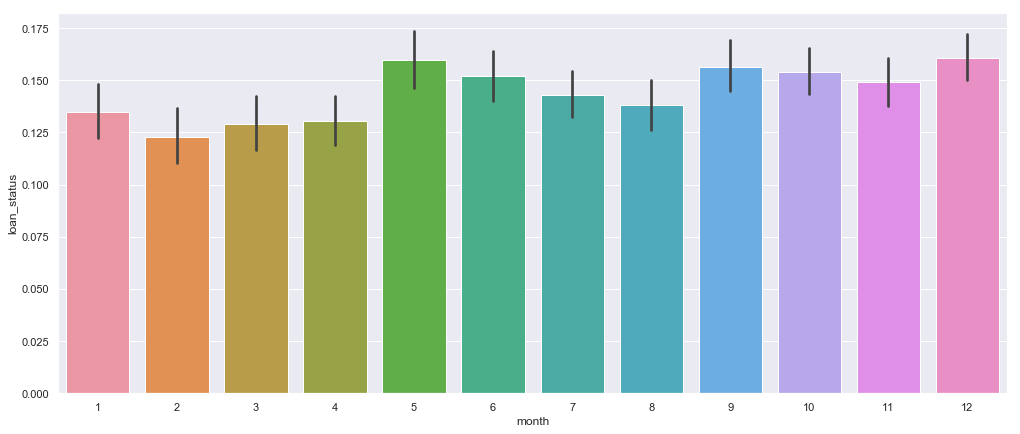

In [184]:
plt.figure(figsize=(17,7))
category_plot('month')#Derived Metrics

In [185]:
#default rate across months: there is not much variation across months in default rates.

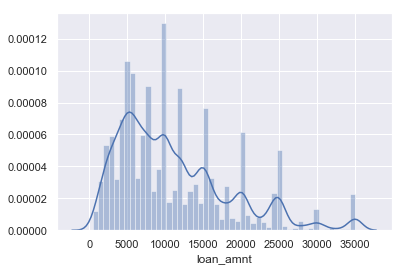

In [186]:
sns.distplot(loan['loan_amnt'])
plt.show()

In [187]:
loan['loan_amnt'].median()#the median of loan amount is 9600.

9600.0

In [188]:
#Now bin the variables across discrete categories. 
#This is to analyse default rates varies across continous variables.
#bin the loan amount into [low, medium, high, very high]

loan['loan_amnt'] = loan['loan_amnt'].apply(lambda x: pd.to_numeric(x))

In [189]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
loan['loan_amnt_bin'] = loan['loan_amnt'].apply(lambda x: loan_amount(x))

In [190]:
loan['loan_amnt_bin'].value_counts()

medium       20675
high          7696
low           7444
very high     2762
Name: loan_amnt_bin, dtype: int64

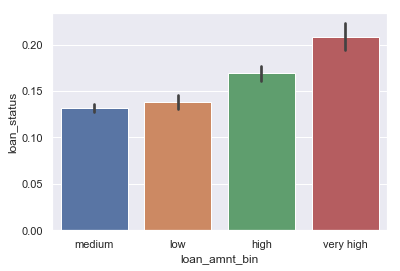

In [191]:
#default rate across loan amount type
category_plot('loan_amnt_bin')

In [192]:
#this shows higher the amount loan, higher the default rate.

In [193]:
#convert the funded amount invested into bins
loan['funded_amnt_inv']=loan['funded_amnt_inv'].apply(lambda x: loan_amount(x))

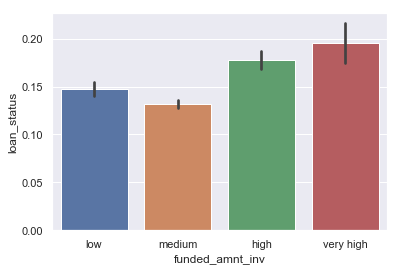

In [194]:
category_plot('funded_amnt_inv')

In [195]:
#convert interest rate to low, medium, high
#binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
        
loan['int_rate_bin'] = loan['int_rate'].apply(lambda x: int_rate(x))

In [196]:
loan['int_rate_bin'].value_counts(ascending=False)

medium    18265
low       12316
high       7996
Name: int_rate_bin, dtype: int64

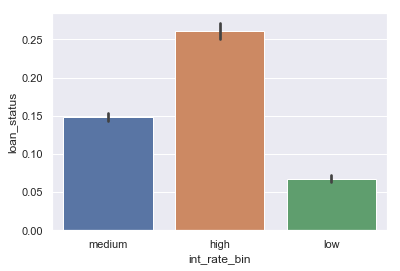

In [197]:
category_plot('int_rate_bin')#the high int_rate is more

In [198]:
#binning of funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
loan['funded_amnt'] = loan['funded_amnt'].apply(lambda x: funded_amount(x))

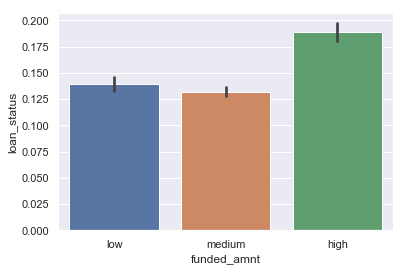

In [199]:
category_plot('funded_amnt')

In [200]:
#binning of installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
loan['installment'] = loan['installment'].apply(lambda x: installment(x))

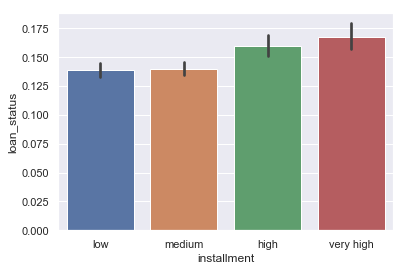

In [201]:
category_plot('installment')

In [202]:
#higher the installment amount higher the default rate.

loan['annual_inc'] = loan['annual_inc'].apply(lambda x: pd.to_numeric(x))

In [203]:
#binning of annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

loan['annual_inc_bin'] = loan['annual_inc'].apply(lambda x: annual_income(x))

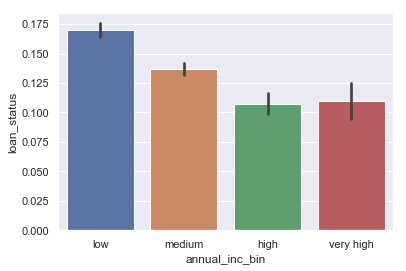

In [204]:
category_plot('annual_inc_bin')#lower the annual income higher the default rate

In [205]:
#dti
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

loan['dti_bin'] = loan['dti'].apply(lambda x: dti(x))

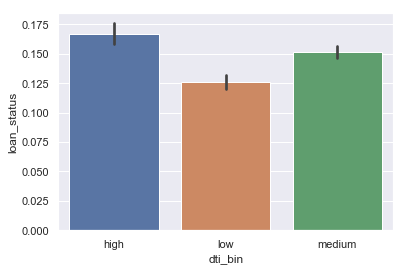

In [206]:
#comparing default rates across dti
#high dti gives higher default rates
category_plot('dti_bin')

In [207]:
#converting charater type emp_lenght to numeric
loan['emp_length'].replace(to_replace={
     '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
},inplace=True)

loan['emp_length']=pd.to_numeric(loan['emp_length'])

In [208]:
loan['emp_length'].value_counts()

10.0    8488
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

In [209]:
#binning of emp_length as low, medium, high, very high
loan = loan[~loan['emp_length'].isnull()]
def emp_length(n):
    if n <= 1:
        return 'low'
    elif n > 1 and n <=3:
        return 'medium'
    elif n > 3 and n <=7:
        return 'high'
    else:
        return 'very high'

loan['emp_length'] = loan['emp_length'].apply(lambda x: emp_length(x))

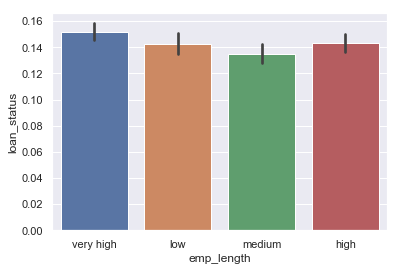

In [210]:
category_plot('emp_length')

In [211]:
#emp_length doesn't varies much across default rates.

In [212]:
#As compared default rates across different variables the most important 
#is the purpose of loan, intrest rate, grade, annual income
#the most affecting default is 'purpose' like in home loan, credit card, debt consolidation and so on.

## SECTION - C 
### Defaulted loan analysis


In [213]:
#taking loan_status=1 for default analysis
defaulted_loans = loan[loan['loan_status'] == 1].copy()


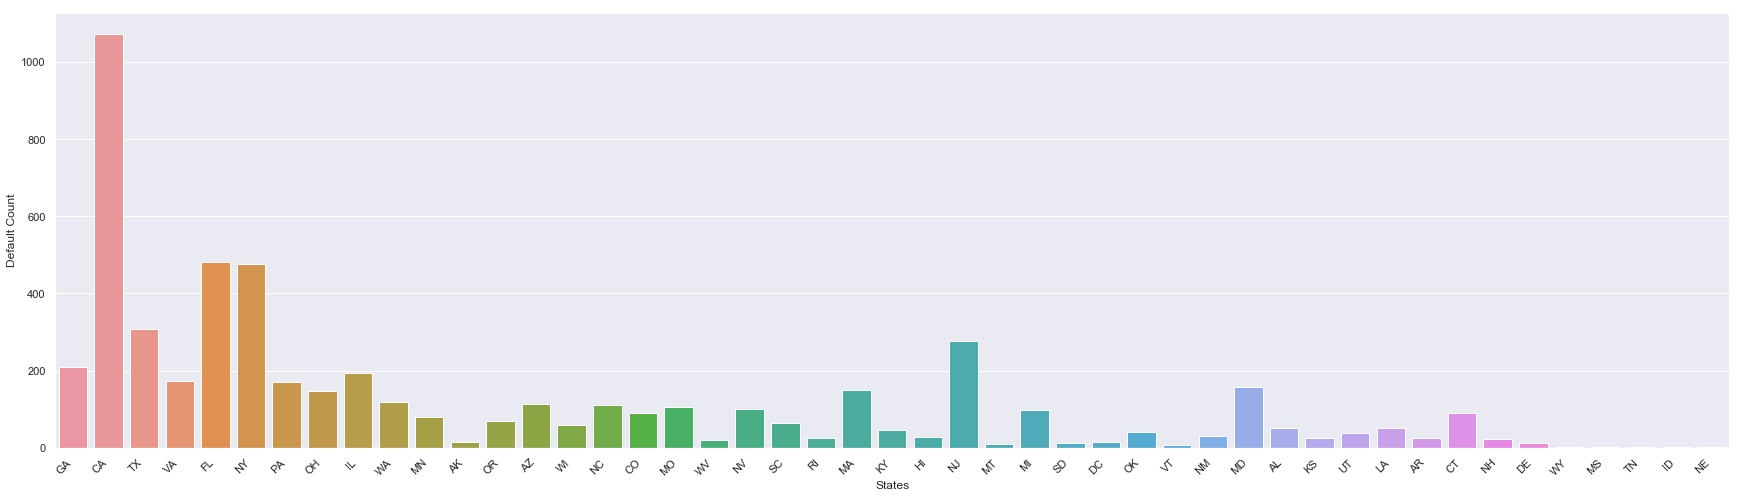

In [214]:
# state variable analysis
plt.figure(figsize=(30, 8))
ax = sns.countplot(x='addr_state', data=defaulted_loans)
ax.set(xlabel='States', ylabel='Default Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [215]:
# clearly we have more defaults in state "CA" i.e. "California"


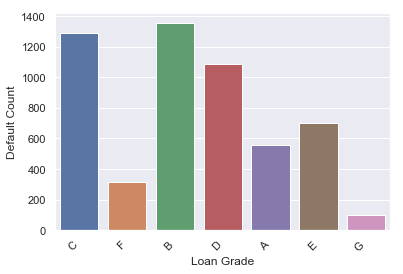

In [216]:
# analysis for loan grade for all defaulted loans

ax = sns.countplot(x='grade', data=defaulted_loans)
ax.set(xlabel='Loan Grade', ylabel='Default Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [217]:
# Heighest defaults in grade B,C,D loan 

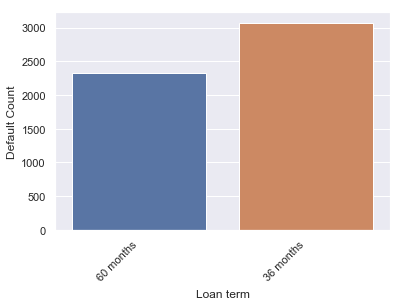

In [218]:
# analysis for term for all defaulted loans
ax = sns.countplot(x='term', data=defaulted_loans)
ax.set(xlabel='Loan term', ylabel='Default Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [219]:
#term 36 months has highest defaulted loans.

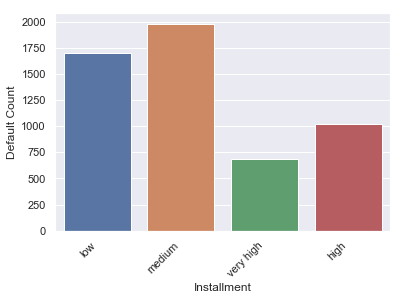

In [220]:
#Analysis for installment for all default loans
ax = sns.countplot(x='installment', data=defaulted_loans)
ax.set(xlabel='Installment', ylabel='Default Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [221]:
# loans with low OR medium installments i.e. less than $200 OR $200-$400 are more likely to be defaulted

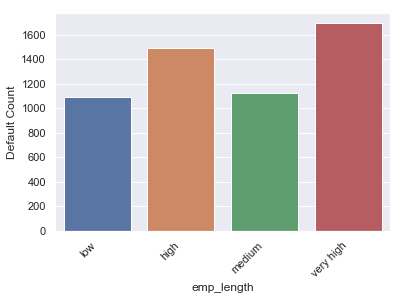

In [222]:
# emp_length analysis for defaulted loans

ax = sns.countplot(x='emp_length', data=defaulted_loans)
ax.set(xlabel='emp_length', ylabel='Default Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [223]:
# This shows customers who are employed for more than 7 years have more defaulted rate


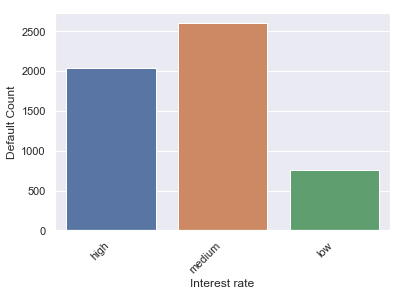

In [224]:
# int_rate analysis with default loan
ax = sns.countplot(x='int_rate_bin', data=defaulted_loans)
ax.set(xlabel='Interest rate', ylabel='Default Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [225]:
# This shows loans with Interest rate between 10-15% have more defaults

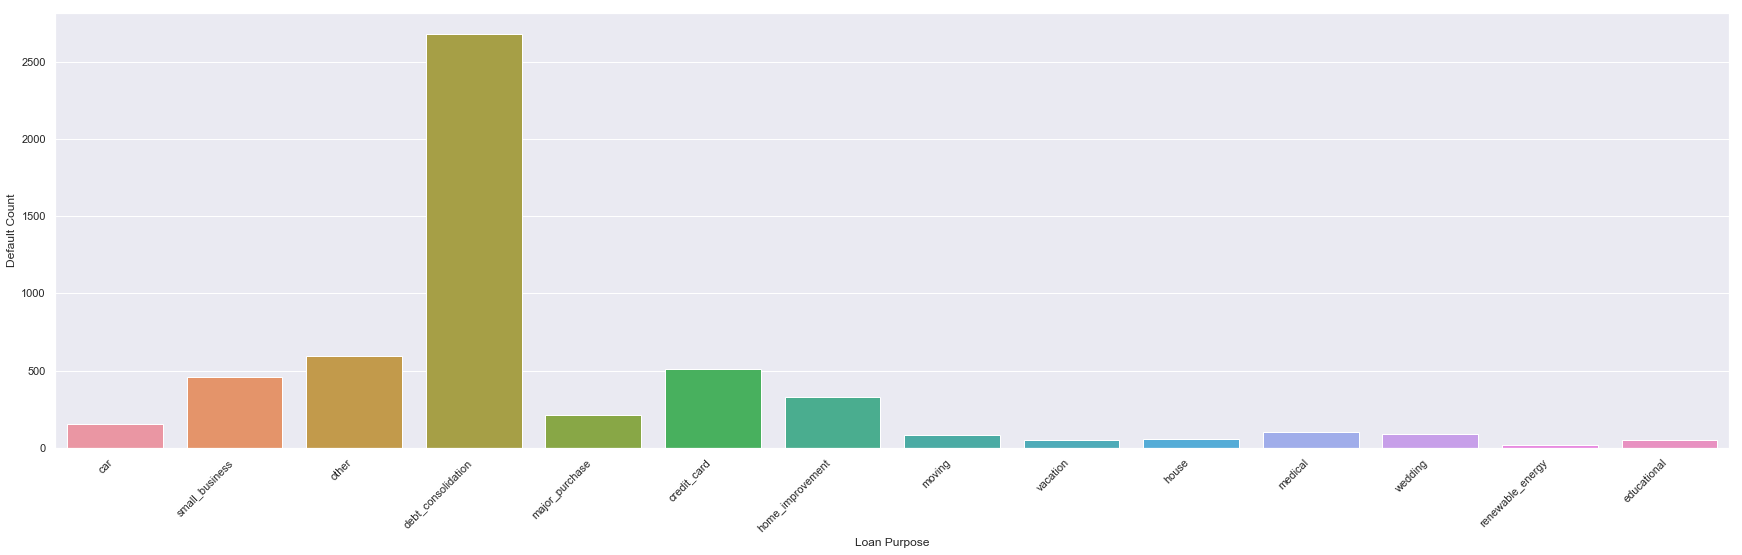

In [226]:
# Now checking loan purpose with default loans
plt.figure(figsize=(30, 8))
ax = sns.countplot(x='purpose', data=defaulted_loans)
ax.set(xlabel='Loan Purpose', ylabel='Default Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [227]:
# this shows that debt_consolidation loans are significantly more defaulted as compared to other.

In [228]:
defaulted_loans['earliest_cr_line'] = pd.to_datetime(defaulted_loans['earliest_cr_line'], format='%b-%y') 
# defaulted_loans['earliest_cr_line'].unique()


In [233]:
defaulted_loans['earliest_cr_line_year'] = defaulted_loans['earliest_cr_line'].apply(lambda x: x.year)
defaulted_loans['earliest_cr_line_month'] = defaulted_loans['earliest_cr_line'].apply(lambda x: x.month)
defaulted_loans['earliest_cr_line_year'].describe().astype('int64')

count    5399
mean     1997
std         7
min      1969
25%      1994
50%      1998
75%      2001
max      2068
Name: earliest_cr_line_year, dtype: int64

In [234]:
# there are clearly future dates for earliest credit line. Now converting future dates like 2068 to 1968. 
# This could be a problem due to string to date  conversion.
defaulted_loans['earliest_cr_line_year'] = defaulted_loans['earliest_cr_line_year'].apply(lambda y: y if int(y) < 2019 else int(y) - 100 )
defaulted_loans['earliest_cr_line_year'].describe().astype('int64')

count    5399
mean     1997
std         6
min      1962
25%      1994
50%      1998
75%      2001
max      2008
Name: earliest_cr_line_year, dtype: int64

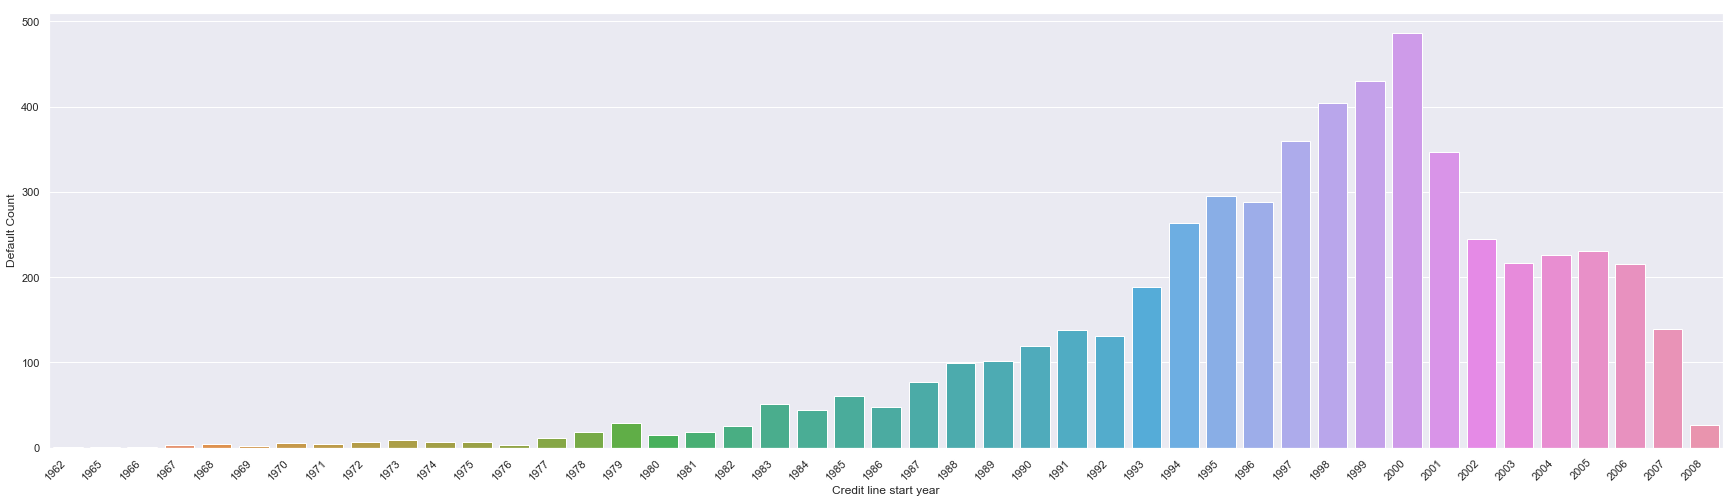

In [99]:
#earliest_cr_line_year with default loans
sns.set(style="darkgrid")
plt.figure(figsize=(30, 8))
ax = sns.countplot(x='earliest_cr_line_year', data=defaulted_loans)
ax.set(xlabel='Credit line start year', ylabel='Default Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [100]:
# this graph shows that customer who started their credit line as early as 1988
# were defaulters at some point in time, and Customers from year 2000 committed heighest number of defaults

In [101]:
# now lets analyze number of open credit lines "open_acc"
defaulted_loans['open_acc'].unique()

array([ 3, 11,  2,  4, 14,  7, 17,  9,  6, 13, 12, 10,  8,  5, 16, 15, 27,
       34, 18, 19, 24, 25, 22, 23, 21, 29, 20, 28, 33, 26, 35, 30, 38, 31])

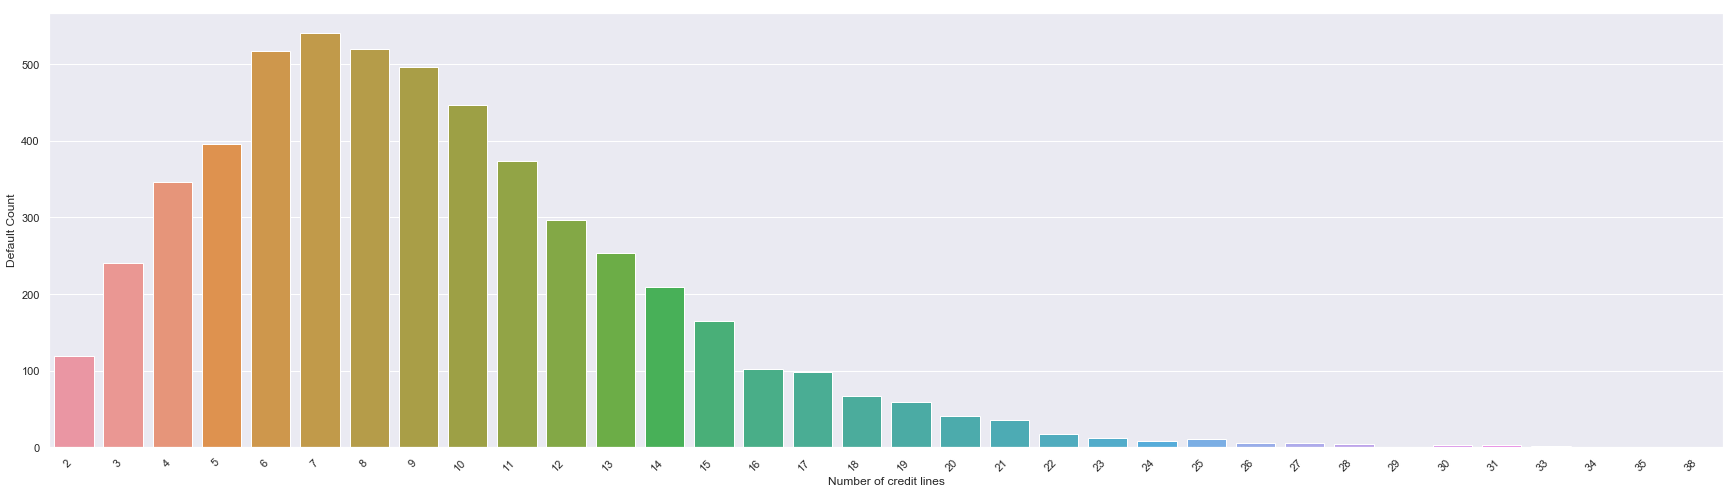

In [102]:
plt.figure(figsize=(30, 8))
ax = sns.countplot(x='open_acc', data=defaulted_loans)
ax.set(xlabel='Number of credit lines', ylabel='Default Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [103]:
# this graph shows even though some customers have more credit lines but they default less.
# however the customers with 3-16 open credit lines default more.

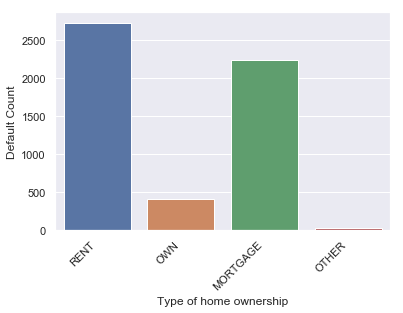

In [141]:
# defaulted analysis for home_ownership
ax = sns.countplot(x='home_ownership', data=defaulted_loans)
ax.set(xlabel='Type of home ownership', ylabel='Default Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [105]:
# people living on RENT or MORTGAGE have defaulted more number for loans

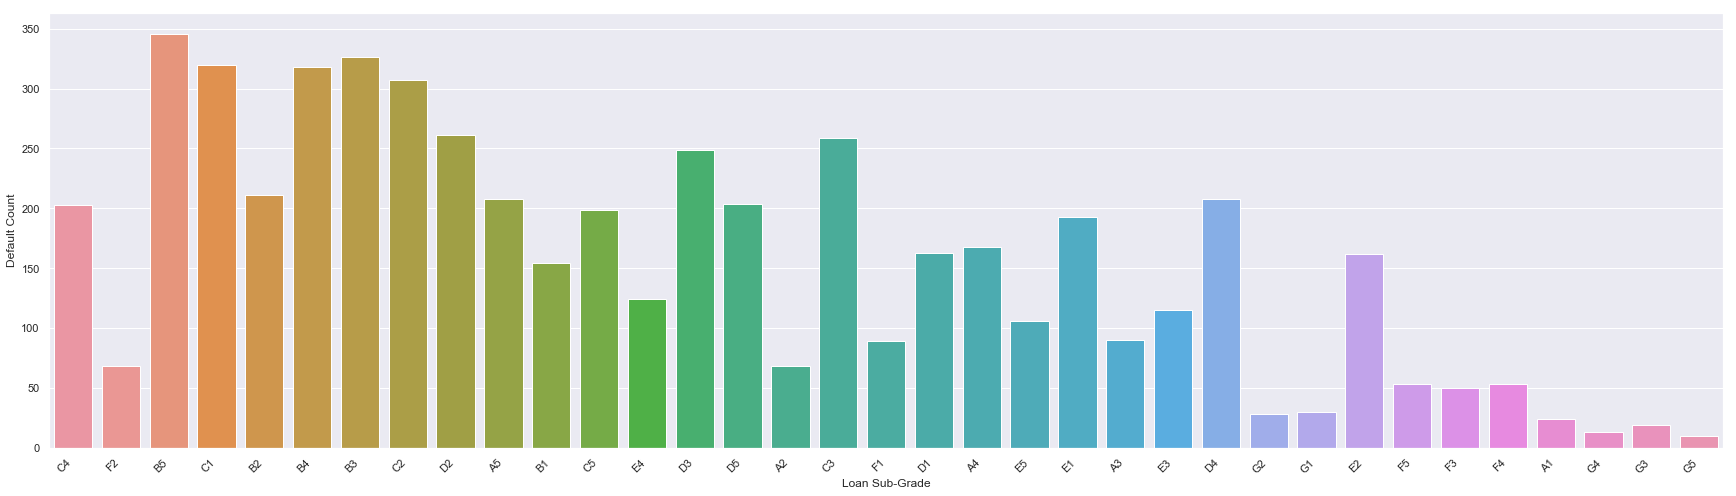

In [106]:
# defaulted analysis for grade
plt.figure(figsize=(30, 8))
ax = sns.countplot(x='sub_grade', data=defaulted_loans)
ax.set(xlabel='Loan Sub-Grade', ylabel='Default Count')
plt.xticks(rotation=45, ha='right')
plt.show()


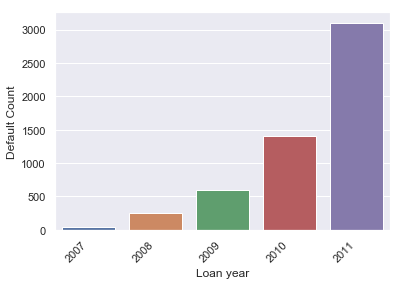

In [107]:
# year data analysis for defaulted loans
ax = sns.countplot(x='year', data=defaulted_loans)
ax.set(xlabel='Loan year', ylabel='Default Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [108]:
# This shows the loan that were disbursed in year 2011 saw more defaults followed by 2010. 
# Overall the defaulting is peaking

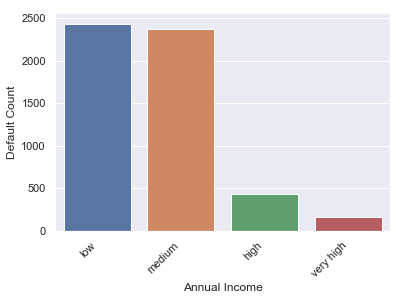

In [109]:
# now interest rate analysis for defaulted loans

ax = sns.countplot(x='annual_inc_bin', data=defaulted_loans)
ax.set(xlabel='Annual Income', ylabel='Default Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [110]:
# this means people with low( less than $50000) and medium($50000 to $100000) 
# income group have more defaulted loans.

In [235]:
# lets derive a new variable income to loan amount ration understand the relevance between two.
defaulted_loans['inc_loan_amt_ratio'] = round(defaulted_loans['annual_inc'] /defaulted_loans['loan_amnt'], 2)
defaulted_loans['inc_loan_amt_ratio'].describe().astype('int64')


count    5399
mean        7
std         8
min         1
25%         3
50%         5
75%         8
max       192
Name: inc_loan_amt_ratio, dtype: int64

In [112]:
def bin_inc_loan_ratio(n):
    if n <= 10:
        return '0-10'
    elif n > 10 and n <=20:
        return '10-20'
    elif n > 20 and n <=30:
        return '20-30'
    else:
        return '30+'

defaulted_loans['inc_loan_amt_ratio_bin'] = defaulted_loans['inc_loan_amt_ratio'].apply(lambda x: bin_inc_loan_ratio(x))


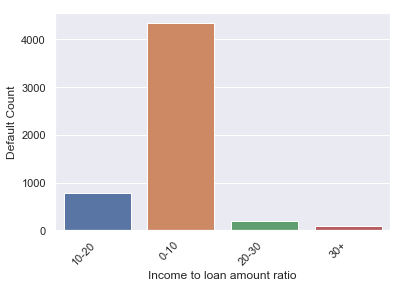

In [113]:
#defaulted loan with inc_loan_amt_ratio
ax = sns.countplot(x='inc_loan_amt_ratio_bin', data=defaulted_loans)
ax.set(xlabel='Income to loan amount ratio', ylabel='Default Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [114]:
# this concludes that people with lower ratio of income to loan amount are more likely to default


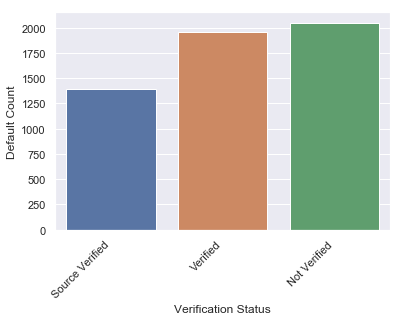

In [115]:
# defaulted loan with verification status.

ax = sns.countplot(x='verification_status', data=defaulted_loans)
ax.set(xlabel='Verification Status', ylabel='Default Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [116]:
# this clearly shows that defaulted loans are high in not verified.

## SECTION - D 
### Bivariate analysis of defaulted loans

<Figure size 2160x1440 with 0 Axes>

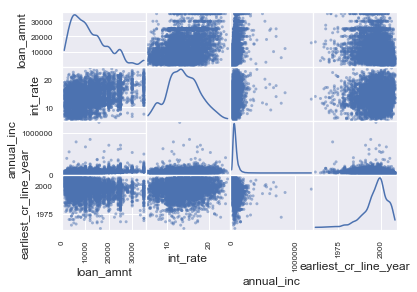

In [136]:
"""
Bivariate analysis on continuous variables
"""
# lets try to see the correlation between folliwng variables:
# loan amount, interest rate, annual income, installment, earliest_cr_line_year,


dl = defaulted_loans[['loan_amnt', 'int_rate', 'annual_inc', 'installment', 'earliest_cr_line_year']]

plt.figure(figsize=(30, 20))
pd.plotting.scatter_matrix(dl, diagonal="kde")
# plt.tight_layout()
plt.show()



In [137]:
dl.corr()

,loan_amnt,int_rate,annual_inc,earliest_cr_line_year
loan_amnt,1.000000,0.344500,0.347746,-0.204837
int_rate,0.344500,1.000000,0.126876,0.091651
annual_inc,0.347746,0.126876,1.000000,-0.221154
earliest_cr_line_year,-0.204837,0.091651,-0.221154,1.000000


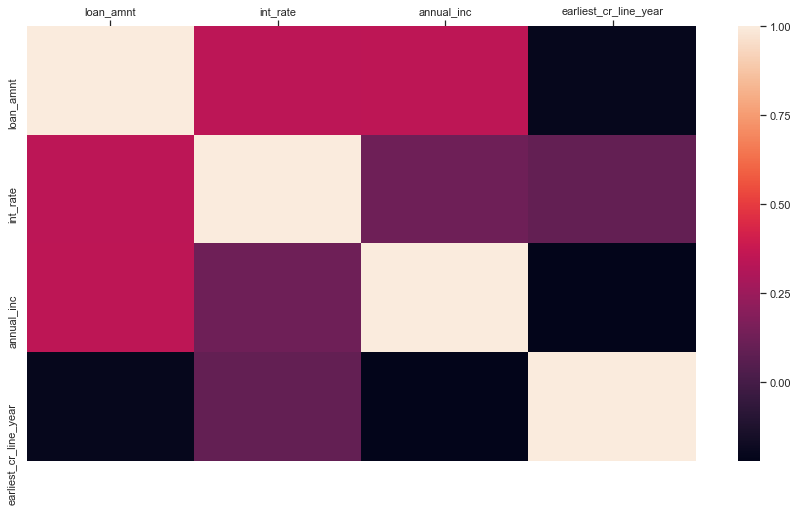

In [140]:
plt.figure(figsize=(15, 8))
sns.heatmap(dl.corr(), vmax=1., square=False).xaxis.tick_top()


In [120]:
# annual income and loan amount have a negative correlation
# annual income, loan amount and interest rate are somewhat correlated to each other around 0.34


## Bivariate analysis on categorical variables

 lets try to see the correlation between following variables:
 grade, purpose, sub_grade, home_ownership, annual_income



In [122]:
# grade and purpose

dl = defaulted_loans[['grade', 'purpose', 'member_id']]
grp = dl.groupby(['grade', 'purpose']).count().reset_index()
grp.columns = ['grade', 'purpose', 'default_count']
grp.head(5)

,grade,purpose,default_count
0,A,car,29
1,A,credit_card,56
2,A,debt_consolidation,231
3,A,educational,4
4,A,home_improvement,39


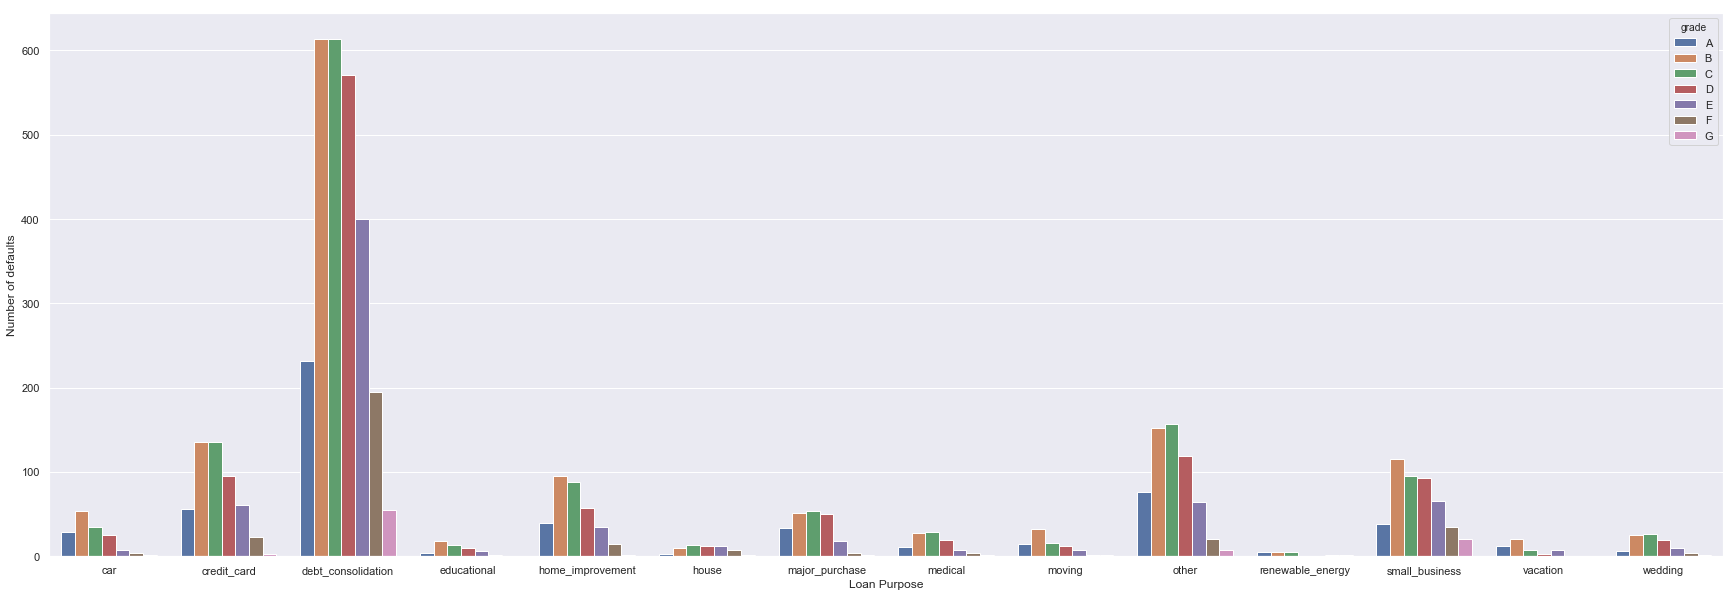

In [123]:
#grade and purpose plot
plt.figure(figsize=(30, 10))
ax = sns.barplot(x='purpose', y='default_count', hue='grade', data=grp)
ax.set(xlabel='Loan Purpose', ylabel='Number of defaults')
plt.show()

In [124]:
# grade and home_ownership

dl = defaulted_loans[['grade', 'home_ownership', 'member_id']]
grp = dl.groupby(['grade', 'home_ownership']).count().reset_index()
grp.columns = ['grade', 'home_ownership', 'default_count']
grp.head(5)

,grade,home_ownership,default_count
0,A,MORTGAGE,244
1,A,OTHER,2
2,A,OWN,45
3,A,RENT,267
4,B,MORTGAGE,572


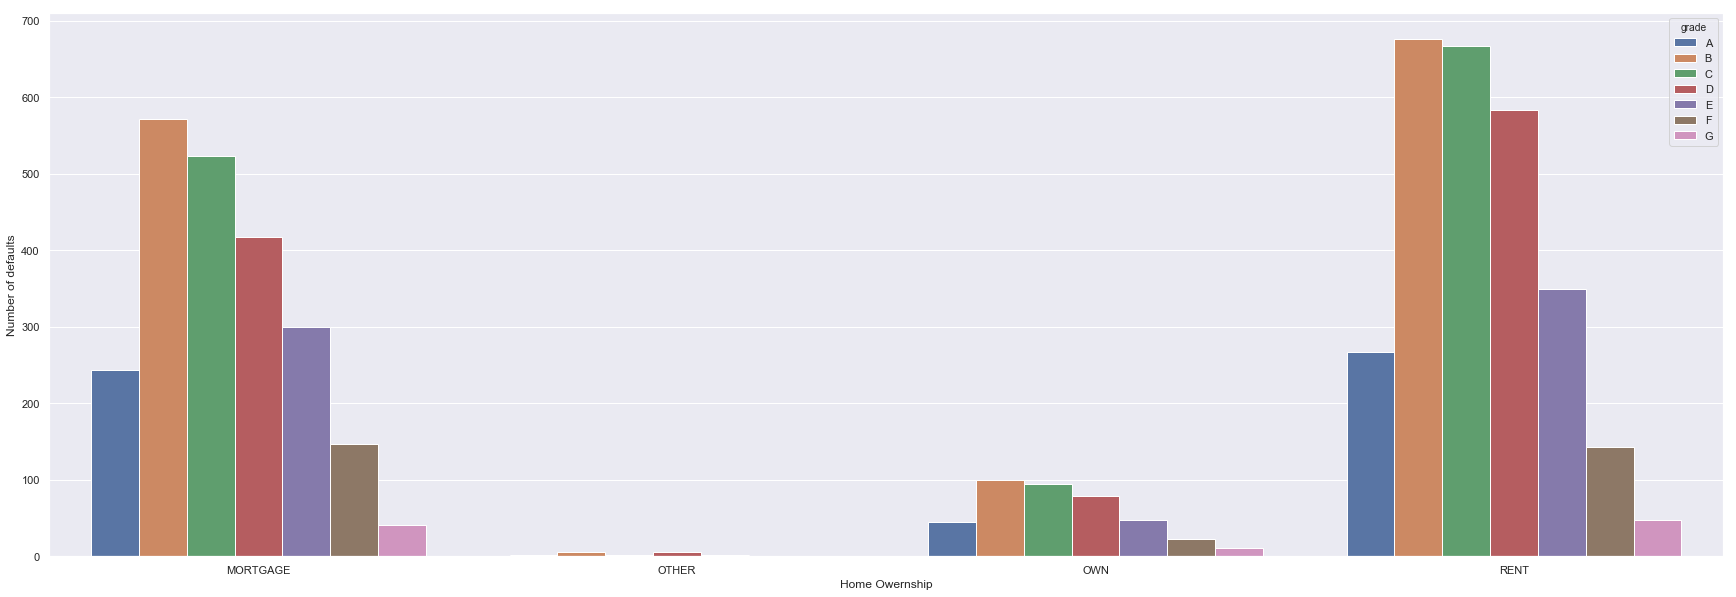

In [125]:
#grade and home_owner_ship plot
plt.figure(figsize=(30, 10))
ax = sns.barplot(x='home_ownership', y='default_count', hue='grade', data=grp)
ax.set(xlabel='Home Owernship', ylabel='Number of defaults')
plt.show()

In [126]:
# purpose and home_ownership

dl = defaulted_loans[['purpose', 'home_ownership', 'member_id']]
grp = dl.groupby(['purpose', 'home_ownership']).count().reset_index()
grp.columns = ['purpose', 'home_ownership', 'default_count']
grp.head(5)


,purpose,home_ownership,default_count
0,car,MORTGAGE,65
1,car,OTHER,1
2,car,OWN,15
3,car,RENT,74
4,credit_card,MORTGAGE,227


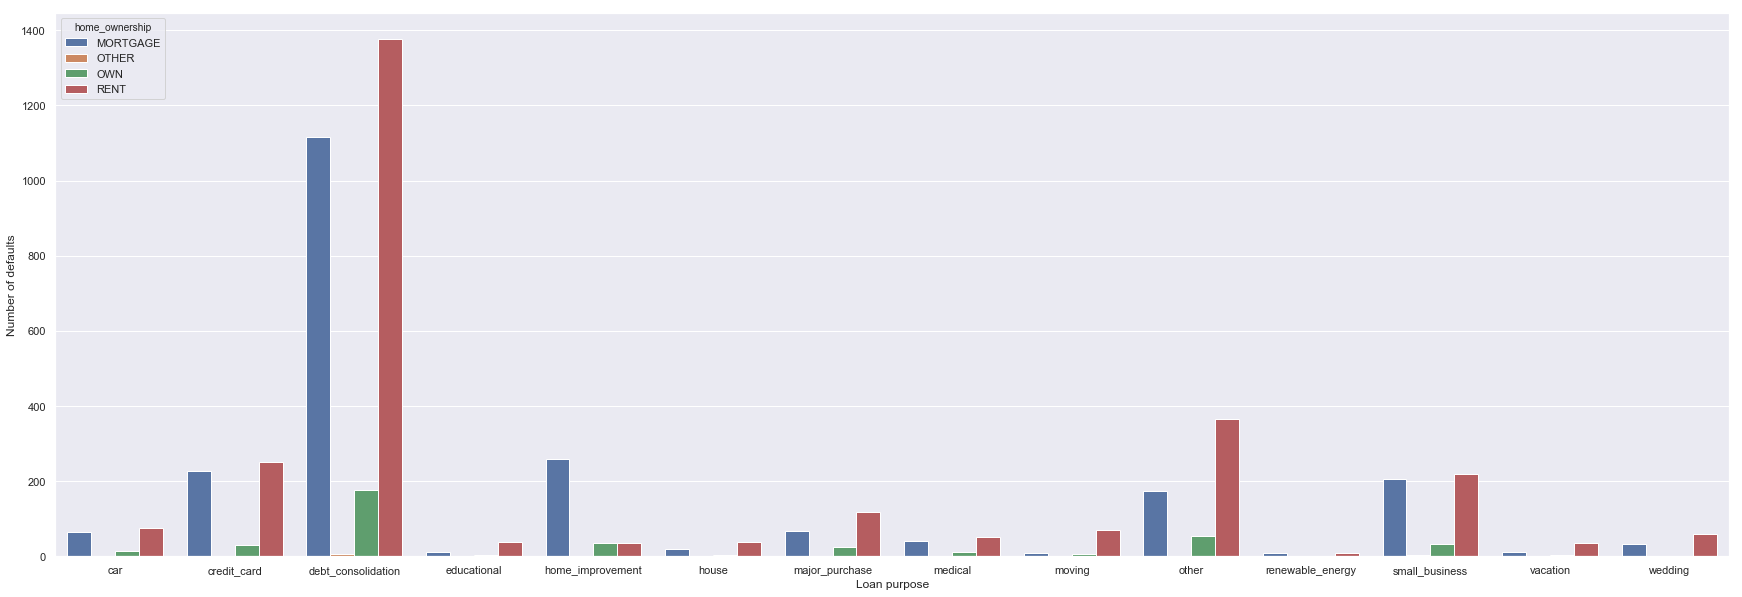

In [127]:
#purpose and home_ownership plot
plt.figure(figsize=(30, 10))
ax = sns.barplot(x='purpose', y='default_count', hue='home_ownership', data=grp)
ax.set(xlabel='Loan purpose', ylabel='Number of defaults')
plt.show()

In [128]:
# grade and sub_grade

dl = defaulted_loans[['grade', 'sub_grade', 'member_id']]
grp = dl.groupby(['grade', 'sub_grade']).count().reset_index()
grp.columns = ['grade', 'sub_grade', 'default_count']
grp.head(5)

,grade,sub_grade,default_count
0,A,A1,24
1,A,A2,68
2,A,A3,90
3,A,A4,168
4,A,A5,208


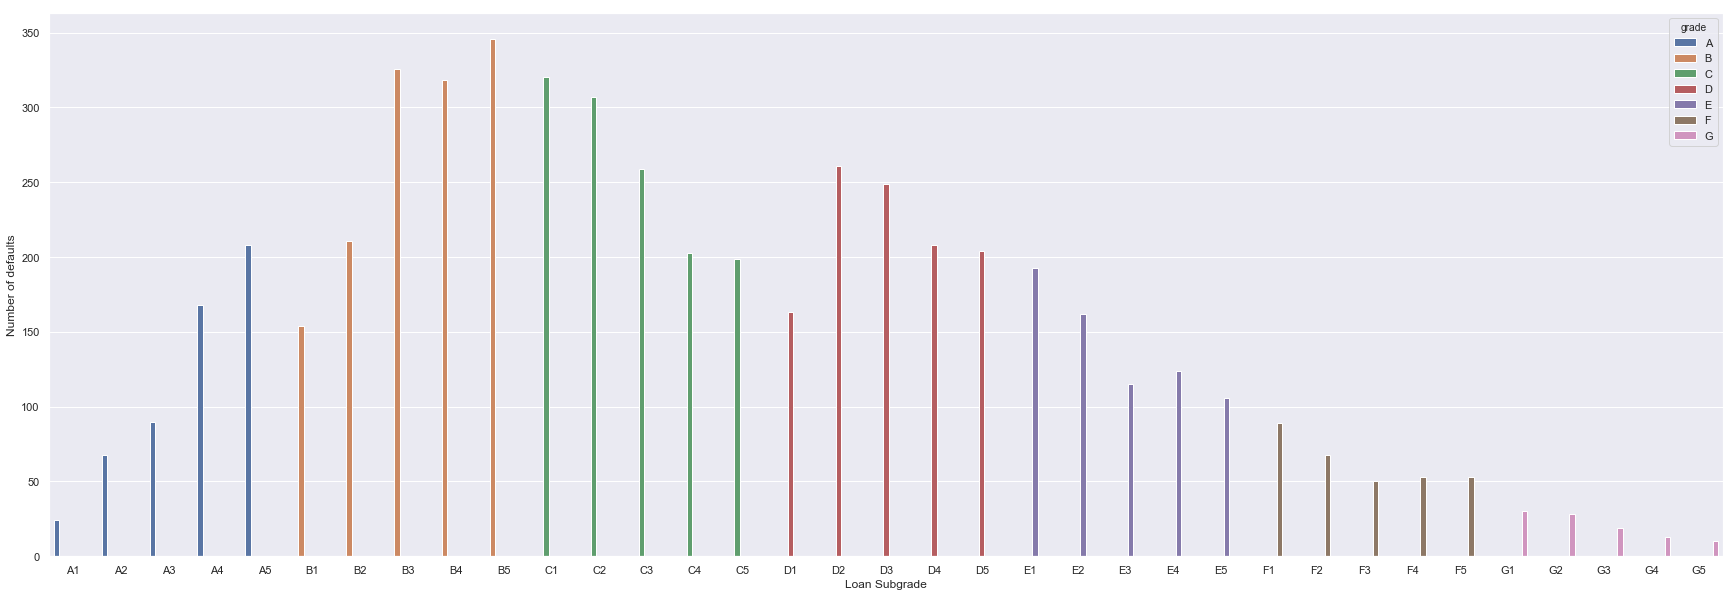

In [129]:
#grade and sub_grade plot
plt.figure(figsize=(30, 10))
ax = sns.barplot(x='sub_grade', y='default_count', hue='grade', data=grp)
ax.set(xlabel='Loan Subgrade', ylabel='Number of defaults')
plt.show()

In [130]:
# purpose and annual income
dl = defaulted_loans[['purpose', 'annual_inc_bin', 'member_id']]
grp = dl.groupby(['purpose', 'annual_inc_bin']).count().reset_index()
grp.columns = ['purpose', 'annual_inc_bin', 'default_count']
grp.head(5)

,purpose,annual_inc_bin,default_count
0,car,high,10
1,car,low,82
2,car,medium,62
3,car,very high,1
4,credit_card,high,48


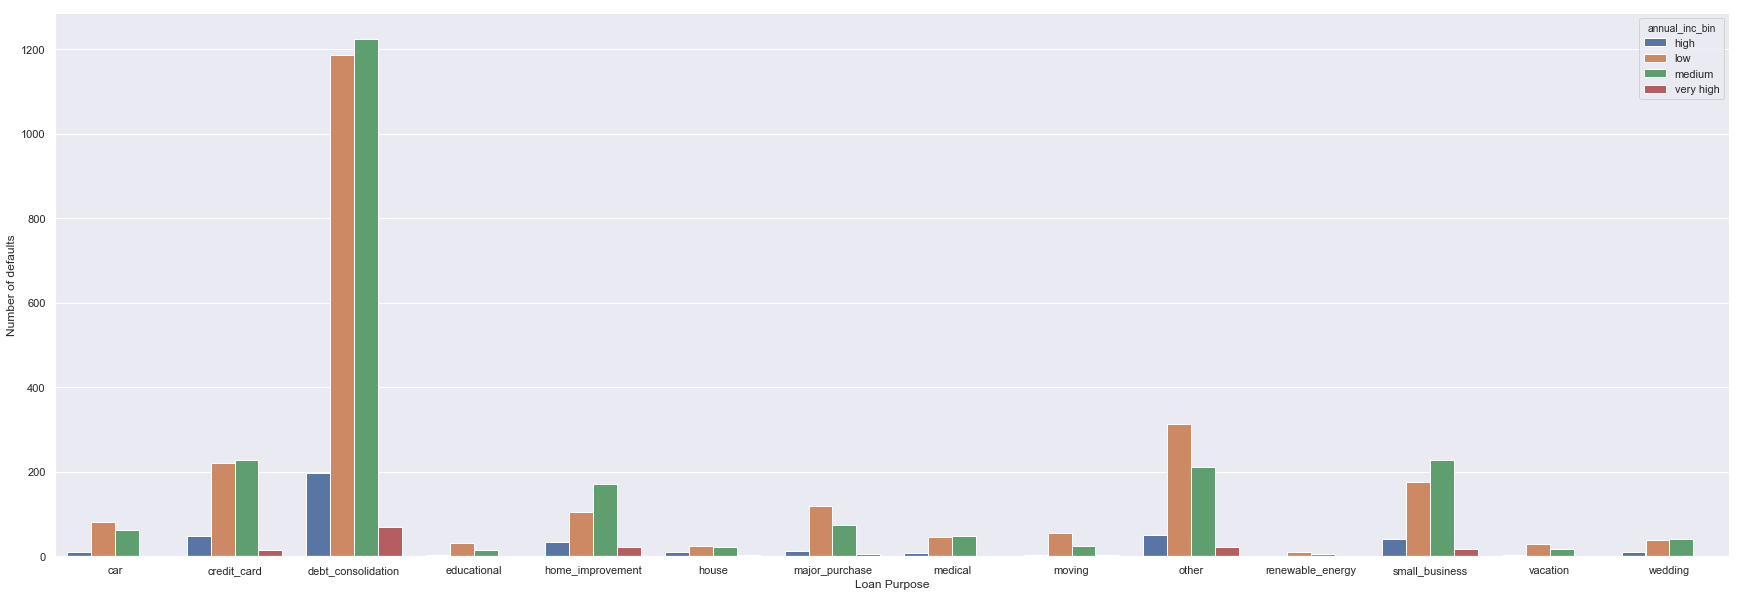

In [131]:
#purpose and annual_inc_bin plot
plt.figure(figsize=(30, 10))
ax = sns.barplot(x='purpose', y='default_count', hue='annual_inc_bin', data=grp)
ax.set(xlabel='Loan Purpose', ylabel='Number of defaults')
plt.show()